# Mobile inverted pendulum python dynamics
author:SeongHyeon Kim

program:PYDY balancing robot simulator


필요한 라이브러리 포함


In [1]:
from sympy import sin, cos, symbols, solve, Matrix, init_printing
from sympy.physics.mechanics import *
from sympy.physics.vector import ReferenceFrame
import sympy.physics.mechanics as me
import sympy as sm
import math as m
import numpy as np

In [2]:
init_vprinting()

# Reference frames

N은 외부의 기준 프레임. 속도를 0으로

In [3]:
#Newtonian reference frame
N=ReferenceFrame('N')

# Define a world coordinate origin
No = Point('No')
No.set_vel(N, 0)

In [4]:
F = ReferenceFrame('F')

P = ReferenceFrame('P')

F = N.orientnew('F', 'Axis',[psi, N.z] )     # Intermediate reference frame

P = F.orientnew('P', 'Axis', [theta, F.y])   # Inverted Pendulum

기준프레임.dcm(상대프레임)

## Newtonian, Bodies, Frames, Particles, Points


In [5]:
Mp =sm.symbols('Mp')
M = sm.symbols('M')

Po = me.Point('p_cm')
Lo = me.Point('l_cm')
body_l_f = me.ReferenceFrame('l_f')

Ro = me.Point('r_cm')
body_r_f = me.ReferenceFrame('r_f')

frame_f = me.ReferenceFrame('f')
Ip = me.Point('I_p')
LN = me.Point('ln')
RN = me.Point('rn')

## Variables, Constants and Specified

In [6]:
x = me.dynamicsymbols('x')            # F1> measure number of Velocity of P in N
xd = me.dynamicsymbols('x', 1)
xd2 = me.dynamicsymbols('x', 2)
theta = me.dynamicsymbols('theta')    # F2> measure number of Angular velocity of P in N
thetad = me.dynamicsymbols('theta', 1)
thetad2 = me.dynamicsymbols('theta', 2)
delta = me.dynamicsymbols('delta')    # N3> measure number of Angular velocity of P in N
deltad = me.dynamicsymbols('delta', 1)
deltad2 = me.dynamicsymbols('delta', 2)
wL = me.dynamicsymbols('wL')          # Angular velocity of L in N
wLd = me.dynamicsymbols('wL', 1)
wLd2 = me.dynamicsymbols('wL', 2)
wR = me.dynamicsymbols('wR')          # Angular velocity of R in N
wRd = me.dynamicsymbols('wR', 1)
wRd2 = me.dynamicsymbols('wR', 2)
TL, TR = me.dynamicsymbols('tL tR')   #Torques on L, R
g = sm.symbols('g', real=True)        #Gravitational acceleration
d = sm.symbols('d', real=True)        # Distance from point I to Lo (or Ro)
R = sm.symbols('r', real=True)        #Radius of wheels
l = sm.symbols('l', real=True)        # Distance from point I to mass center of P
t = sm.symbols('t')


# Create q and dq vectors
q = Matrix([x, delta, theta, wL, wR])
dq = q.diff()

## Mass and Inertia

In [24]:
K,J = symbols('K J')

In [25]:
I_L = inertia(F, K,J,K)                          #Wheel inertia 
I_R = inertia(F, K,J,K)


In [26]:
m_b = symbols('m_b')                              #Mass of the body
I1, I2, I3 = symbols('I1 I2 I3')                  #Moments of inertia of body

In [29]:
# Calculate inertia of body
Ib = inertia(F, I1, I2, I3)

###  Geometry relating unit vectors

In [30]:
F.orient(N, 'Axis', [delta, N.z])

In [31]:
P.orient(F, 'Axis', [theta, F.y])

In [32]:
N.dcm(F)

⎡cos(δ)  -sin(δ)  0⎤
⎢                  ⎥
⎢sin(δ)  cos(δ)   0⎥
⎢                  ⎥
⎣  0        0     1⎦

In [33]:
F.dcm(P)

⎡cos(θ)   0  sin(θ)⎤
⎢                  ⎥
⎢   0     1    0   ⎥
⎢                  ⎥
⎣-sin(θ)  0  cos(θ)⎦

## Position vectors

P_No_I = x*F.x    # Point No to I
P_I_Po = l*P.z    # Point I to mass center of P
P_I_Lo = d*F.y    # Point I to center of wheel L
P_I_Ro = -d*F.y   # Point I to center of wheel R
P_Lo_LN = -R*F.z   # Center of wheel L to contact point LN
P_Ro_RN = -R*F.z   # Center of wheel R to contact point RN

In [34]:
I = No.locatenew('I', x*F.x)      # Point No to I

Po = I.locatenew('Po', l*P.z)     # Point I to mass center of P

Lo = I.locatenew('Lo', d*F.y)     # Point I to center of wheel L

Ro = I.locatenew('Ro', -d*F.y)    # Point I to center of wheel R

LN = Lo.locatenew('LN', -R*F.z)   # Center of wheel L to contact point LN

RN = Ro.locatenew('RN', -R*F.z)   # Center of wheel R to contact point RN

## Angular Velocities


In [35]:
F.set_ang_vel(N, deltad*N.z)        # Angular velocity of F in N
P.set_ang_vel(F, thetad*F.y)        # Angular velocity of P in F
body_l_f.set_ang_vel(F, wLd*F.y)    # wL is related to w and v due to rolling
body_r_f.set_ang_vel(F, wRd*F.y)    # wR is related to w and v due to rolling

## Velocities of relevant points

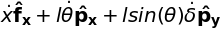

In [36]:
V_I_N = I.set_vel(N, xd*F.x)             # Velocity of point I in N

V_PO_N = Po.v2pt_theory(I,N,P)           # Velocity of center of mass of P

V_LO_N = Lo.v2pt_theory(I, N,P,)         # Velocity of center of L

V_RO_N = Ro.v2pt_theory(I,N,P)           # Velocity of center of R

V_LN_N = LN.v2pt_theory(Lo,N,body_l_f)          # Velocity of contact point of L

V_RN_N = RN.v2pt_theory(Ro,N,body_r_f)          # Velocity of contact point of R

V_PO_N


In [54]:

body_p = me.RigidBody('p', Po, P, Mp, (Ib, Po))
body_l = me.RigidBody('l', Lo, body_l_f, M, (I_L, Lo))
body_r = me.RigidBody('r', Ro, body_r_f, M,(I_R, Ro))

### Forces

In [55]:
#중력벡터
Gravity = -g * N.z
fL = []

fL.extend([(body_p_f, -g*Mp*N.z),(body_r_f, -g*M*N.z),(body_l_f, -g*M*N.z)],)

In [56]:

fL.append([(body_p_f, -TL*F.y), (body_l_f, TL*F.y)])     #Torques on L

    
fL.append([(body_p_f, -TR*F.y), (body_r_f, TR*F.y)])    #Torques on R

fL

[(p_f, - Mp*g*N.z),
 (r_f, - M*g*N.z),
 (l_f, - M*g*N.z),
 [(p_f, - tL*F.y), (l_f, tL*F.y)],
 [(p_f, - tR*F.y), (r_f, tR*F.y)]]

## Nonholonomic Constranits

In [57]:
# Express the velocity of points in the inertial frame
con1 = LN.vel(N).express(N).args[0][0]
con2 = RN.vel(N).express(N).args[0][0]
# Create a matrix of constraints
constraints = con1.col_join(con2)
constraints

⎡(-d⋅δ̇ - r⋅wL̇ + ẋ)⋅cos(δ)⎤
⎢                           ⎥
⎢(-d⋅δ̇ - r⋅wL̇ + ẋ)⋅sin(δ)⎥
⎢                           ⎥
⎢             0             ⎥
⎢                           ⎥
⎢(d⋅δ̇ - r⋅wṘ + ẋ)⋅cos(δ) ⎥
⎢                           ⎥
⎢(d⋅δ̇ - r⋅wṘ + ẋ)⋅sin(δ) ⎥
⎢                           ⎥
⎣             0             ⎦

In [58]:
# Solve for dx, dy, and dtheta in terms of dphi1 and dphi2
sol = solve(constraints, dq[:3])

# Split the resulting dict into a rhs and lhs, that are equivalent
sol_rhs = Matrix(list(sol.values()))
sol_lhs = Matrix(list(sol.keys()))

# Since sol_rhs = sol_lhs --> sol_rhs - sol_lhs = 0
# This forms the basis of our constraint matrix.
# Combining, and solving for a linear representation:
c = (sol_rhs - sol_lhs).jacobian(dq[:5])
c

⎡           -r    r ⎤
⎢0   -1  0  ───  ───⎥
⎢           2⋅d  2⋅d⎥
⎢                   ⎥
⎢            r    r ⎥
⎢-1  0   0   ─    ─ ⎥
⎣            2    2 ⎦

In [59]:
# Constraint Equations
coneqs = (c*dq)
coneqs

⎡      r⋅wL̇   r⋅wṘ⎤
⎢-δ̇ - ───── + ─────⎥
⎢       2⋅d     2⋅d ⎥
⎢                   ⎥
⎢r⋅wL̇   r⋅wṘ      ⎥
⎢───── + ───── - ẋ ⎥
⎣  2       2        ⎦

## Generalized Forces

The inputs of system are the torques at the wheels. Using the right-hand-rule, it can be seen that a positive torque will exert force on the system in the $R_x$ direction. With a wheel radius of $r$, the force on the wheel hubs is:

$\vec{F_{hub}} = \tau*\vec{R_x}$

In [60]:
# Define forces on system:
T1, T2 = symbols('tau_1, tau_2')              # Torques from the wheels
fl = [(Lo, T1/R*P.y),
      (Ro, T2/R*P.y)]

## Lagrangian equations of motion


In [62]:
Lag = Lagrangian(N, body_l, body_r, body_p)

In [63]:
lm = LagrangesMethod(Lag, q, nonhol_coneqs=coneqs, forcelist=fl, frame=N)

In [64]:
le = lm.form_lagranges_equations()
le

⎡                                                   ⎛               2         
⎢       M⋅(-2⋅d⋅δ̈ + 2⋅ẍ)   M⋅(2⋅d⋅δ̈ + 2⋅ẍ)   Mp⋅⎝- 2⋅l⋅sin(θ)⋅θ̇  + 2⋅l⋅co
⎢       ────────────────── + ───────────────── + ─────────────────────────────
⎢               2                    2                                2       
⎢                                                                             
⎢                                                          2    2             
⎢I₃⋅δ̈ + 2⋅K⋅δ̈ - M⋅d⋅(-d⋅δ̈ + ẍ) + M⋅d⋅(d⋅δ̈ + ẍ) + Mp⋅l ⋅sin (θ)⋅δ̈ + 2⋅Mp
⎢                                                                             
⎢            ⎛   2                 2                   ⎞      ⎛   2           
⎢         Mp⋅⎝2⋅l ⋅sin(θ)⋅cos(θ)⋅δ̇  - 2⋅l⋅sin(θ)⋅θ̇⋅ẋ⎠   Mp⋅⎝2⋅l ⋅θ̈ - 2⋅l⋅s
⎢ I₂⋅θ̈ - ────────────────────────────────────────────── + ───────────────────
⎢                               2                                             
⎢                                                   

In [66]:
lm.mass_matrix_full

⎡1  0  0  0  0       0                       0                       0        
⎢                                                                             
⎢0  1  0  0  0       0                       0                       0        
⎢                                                                             
⎢0  0  1  0  0       0                       0                       0        
⎢                                                                             
⎢0  0  0  1  0       0                       0                       0        
⎢                                                                             
⎢0  0  0  0  1       0                       0                       0        
⎢                                                                             
⎢0  0  0  0  0   2⋅M + Mp                    0                  Mp⋅l⋅cos(θ)   
⎢                                                                             
⎢                                            2      

In [69]:
lm.forcing_full

⎡                                ẋ                                ⎤
⎢                                                                  ⎥
⎢                                δ̇                                ⎥
⎢                                                                  ⎥
⎢                                θ̇                                ⎥
⎢                                                                  ⎥
⎢                               wL̇                                ⎥
⎢                                                                  ⎥
⎢                               wṘ                                ⎥
⎢                                                                  ⎥
⎢                                       2                          ⎥
⎢                         Mp⋅l⋅sin(θ)⋅θ̇                           ⎥
⎢                                                                  ⎥
⎢                          2                                       ⎥
⎢                   -2⋅Mp⋅l ⋅sin(θ